Different simple test cases to see how the algorithm behaves.

In [5]:
using DIVAnd
using PyPlot
using PyCall
using Dates

In [6]:
longrid = 0.:1.:20.
latgrid = 0.:1.:10.
mask, (pm, pn), (xi, yi) = DIVAnd.DIVAnd_rectdom(longrid, latgrid);
xx, yy = ndgrid(longrid, latgrid);

([0.0 0.0 … 0.0 0.0; 1.0 1.0 … 1.0 1.0; … ; 19.0 19.0 … 19.0 19.0; 20.0 20.0 … 20.0 20.0], [0.0 1.0 … 9.0 10.0; 0.0 1.0 … 9.0 10.0; … ; 0.0 1.0 … 9.0 10.0; 0.0 1.0 … 9.0 10.0])

## Analysis

In [49]:
L = 2.0

2.0

In [36]:
function plot_analysis(xx::Array, yy::Array, heat::Array, lonpre::Vector, latpre::Vector)
    fig = figure(figsize=(12, 6))
    pcm = PyPlot.pcolormesh(xx, yy, heat)
    colorbar(pcm)
    plot(lonpre, latpre, "ko", ms=2)
    #plot(xx[:], yy[:], "wo", ms=1)
    show()
end

plot_analysis (generic function with 1 method)

### 1. One presence data point

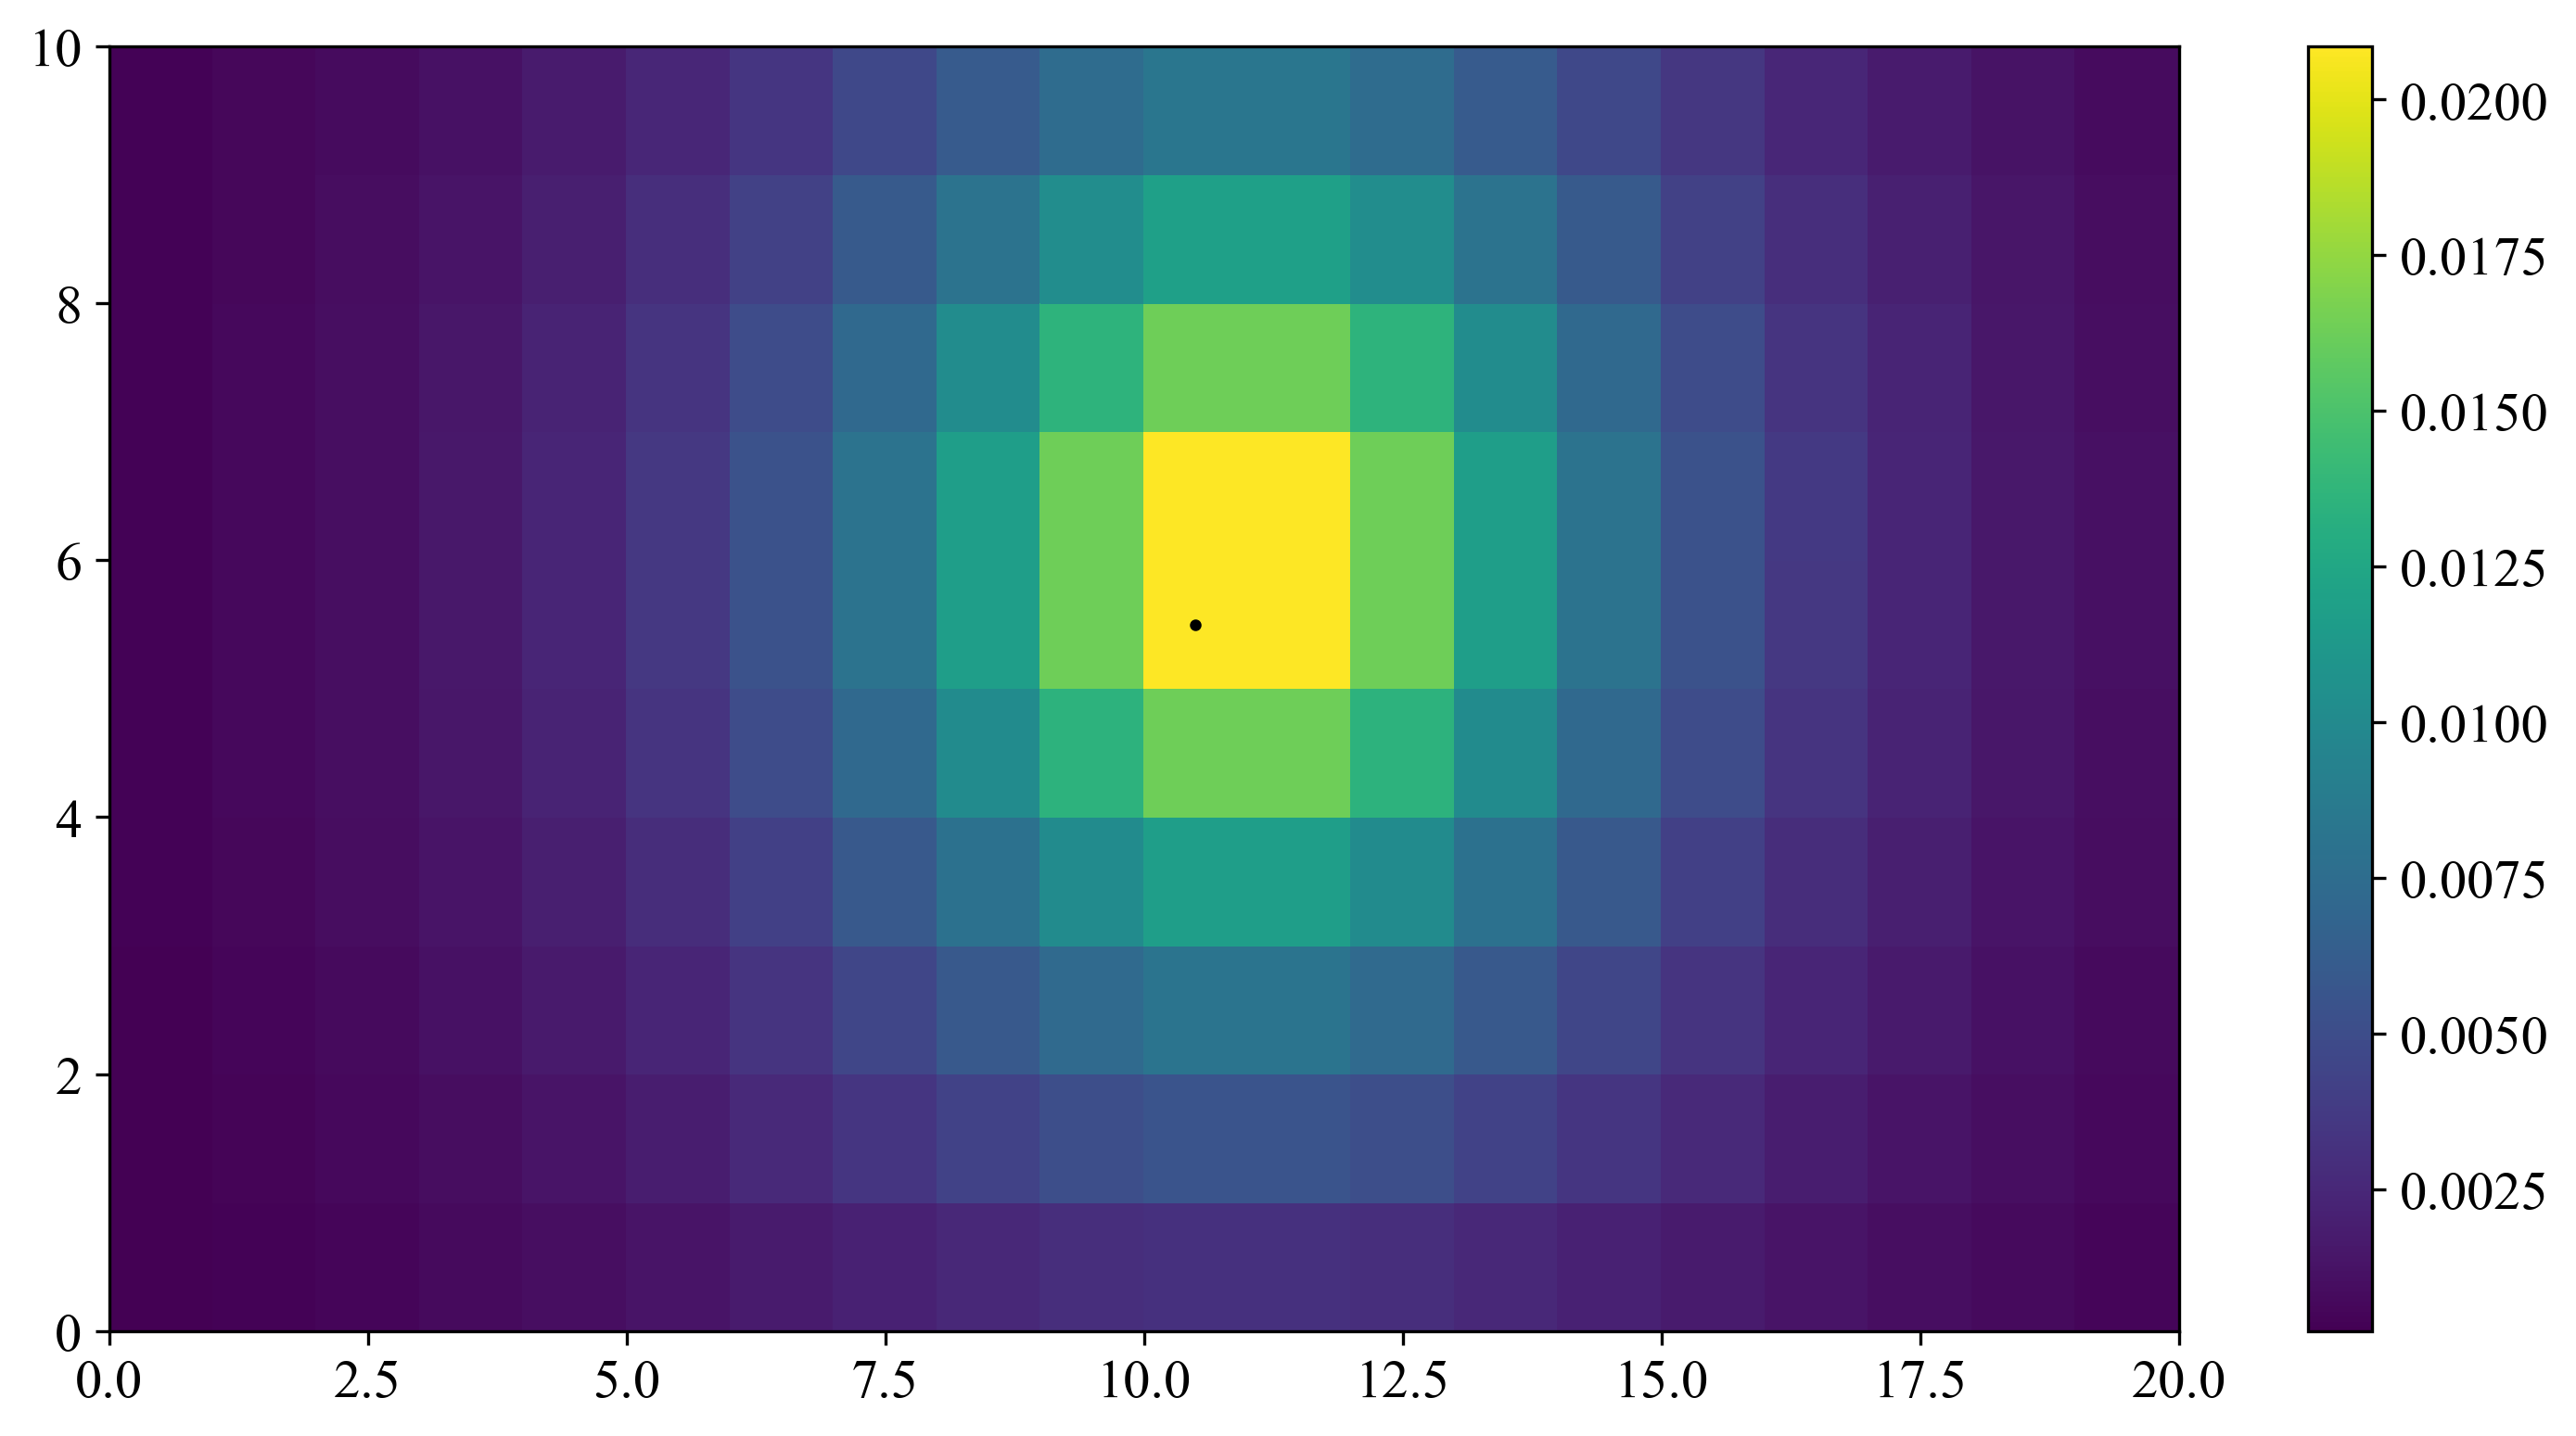

  0.002240 seconds (2.40 k allocations: 2.951 MiB)


In [41]:
lonpre = [10.5]
latpre = [5.5]
@time dens1, LHM1, LCV1, LSCV1 = DIVAnd_heatmap(mask, (pm,pn), (xx, yy), 
    (lonpre, latpre), ones(length(lonpre)), L);
plot_analysis(xx, yy, dens1, lonpre, latpre);

### 2. Two presence data points

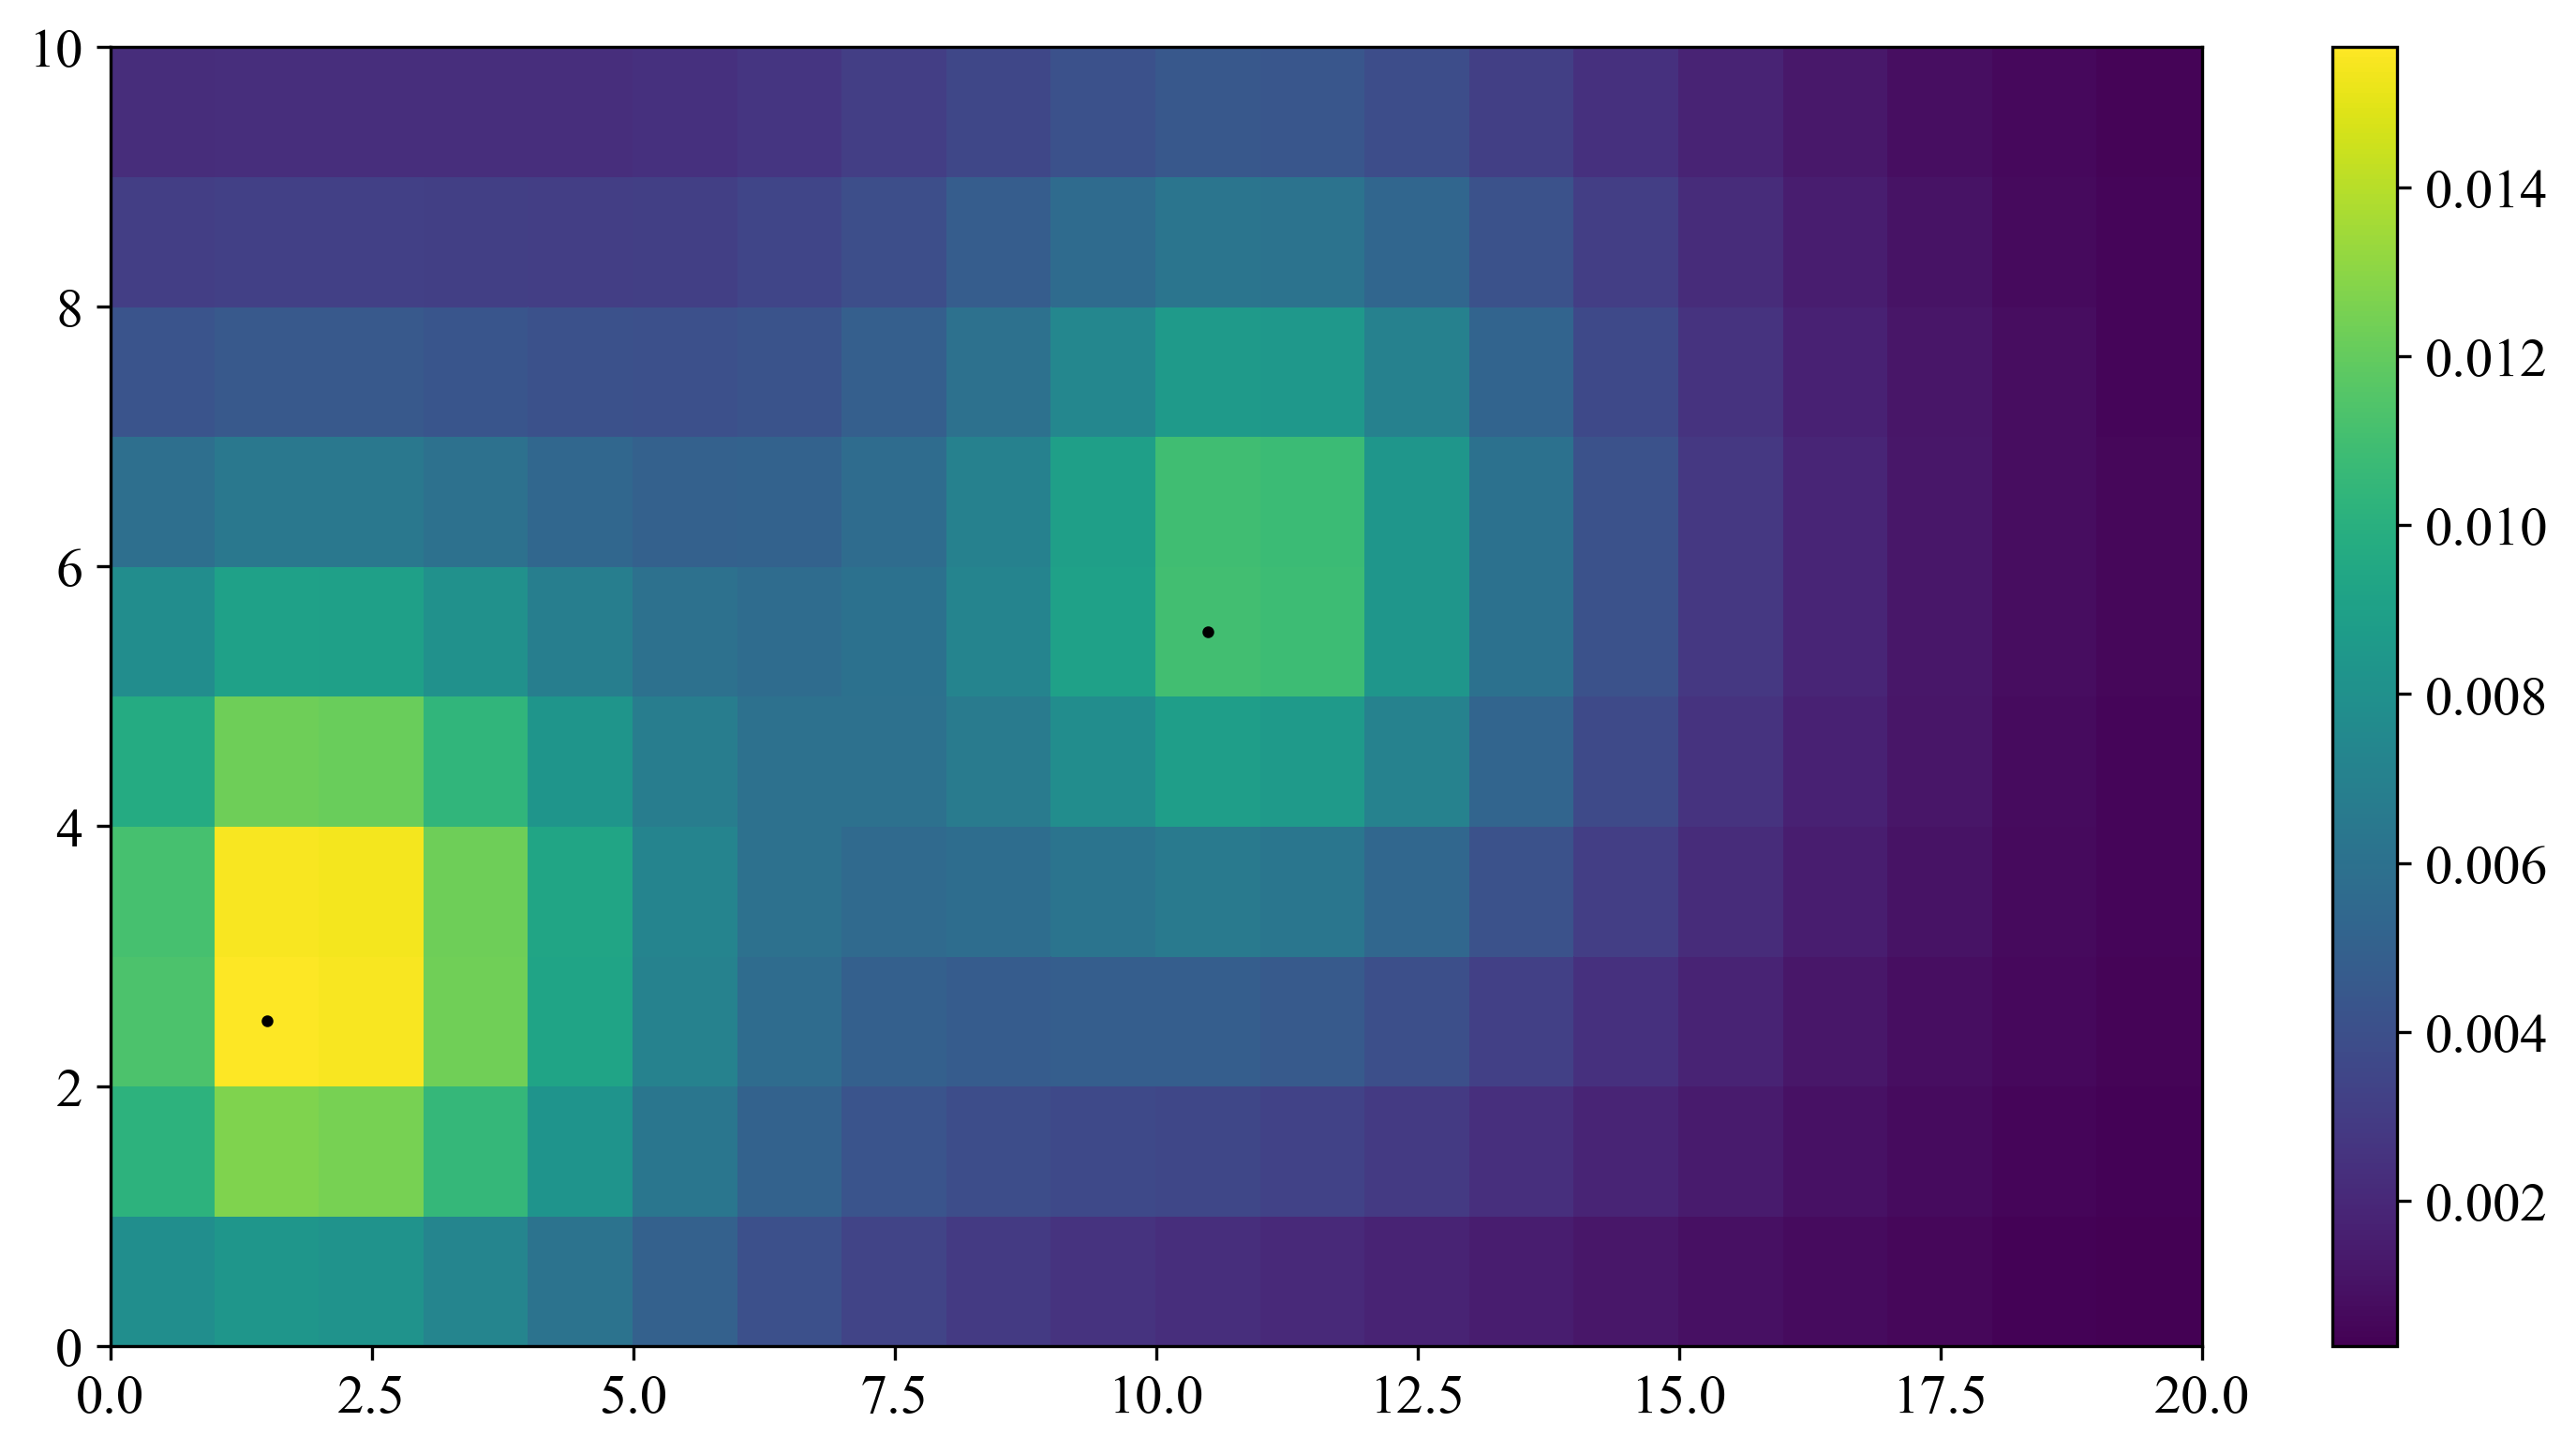

  0.001949 seconds (2.47 k allocations: 3.000 MiB)


In [40]:
lonpre = [10.5, 1.5]
latpre = [5.5, 2.5]
@time dens2, LHM2, LCV2, LSCV2 = DIVAnd_heatmap(mask, (pm,pn), (xx, yy), 
    (lonpre, latpre), ones(length(lonpre)), L);
plot_analysis(xx, yy, dens2, lonpre, latpre);

### 3. Two presence data points at the same location

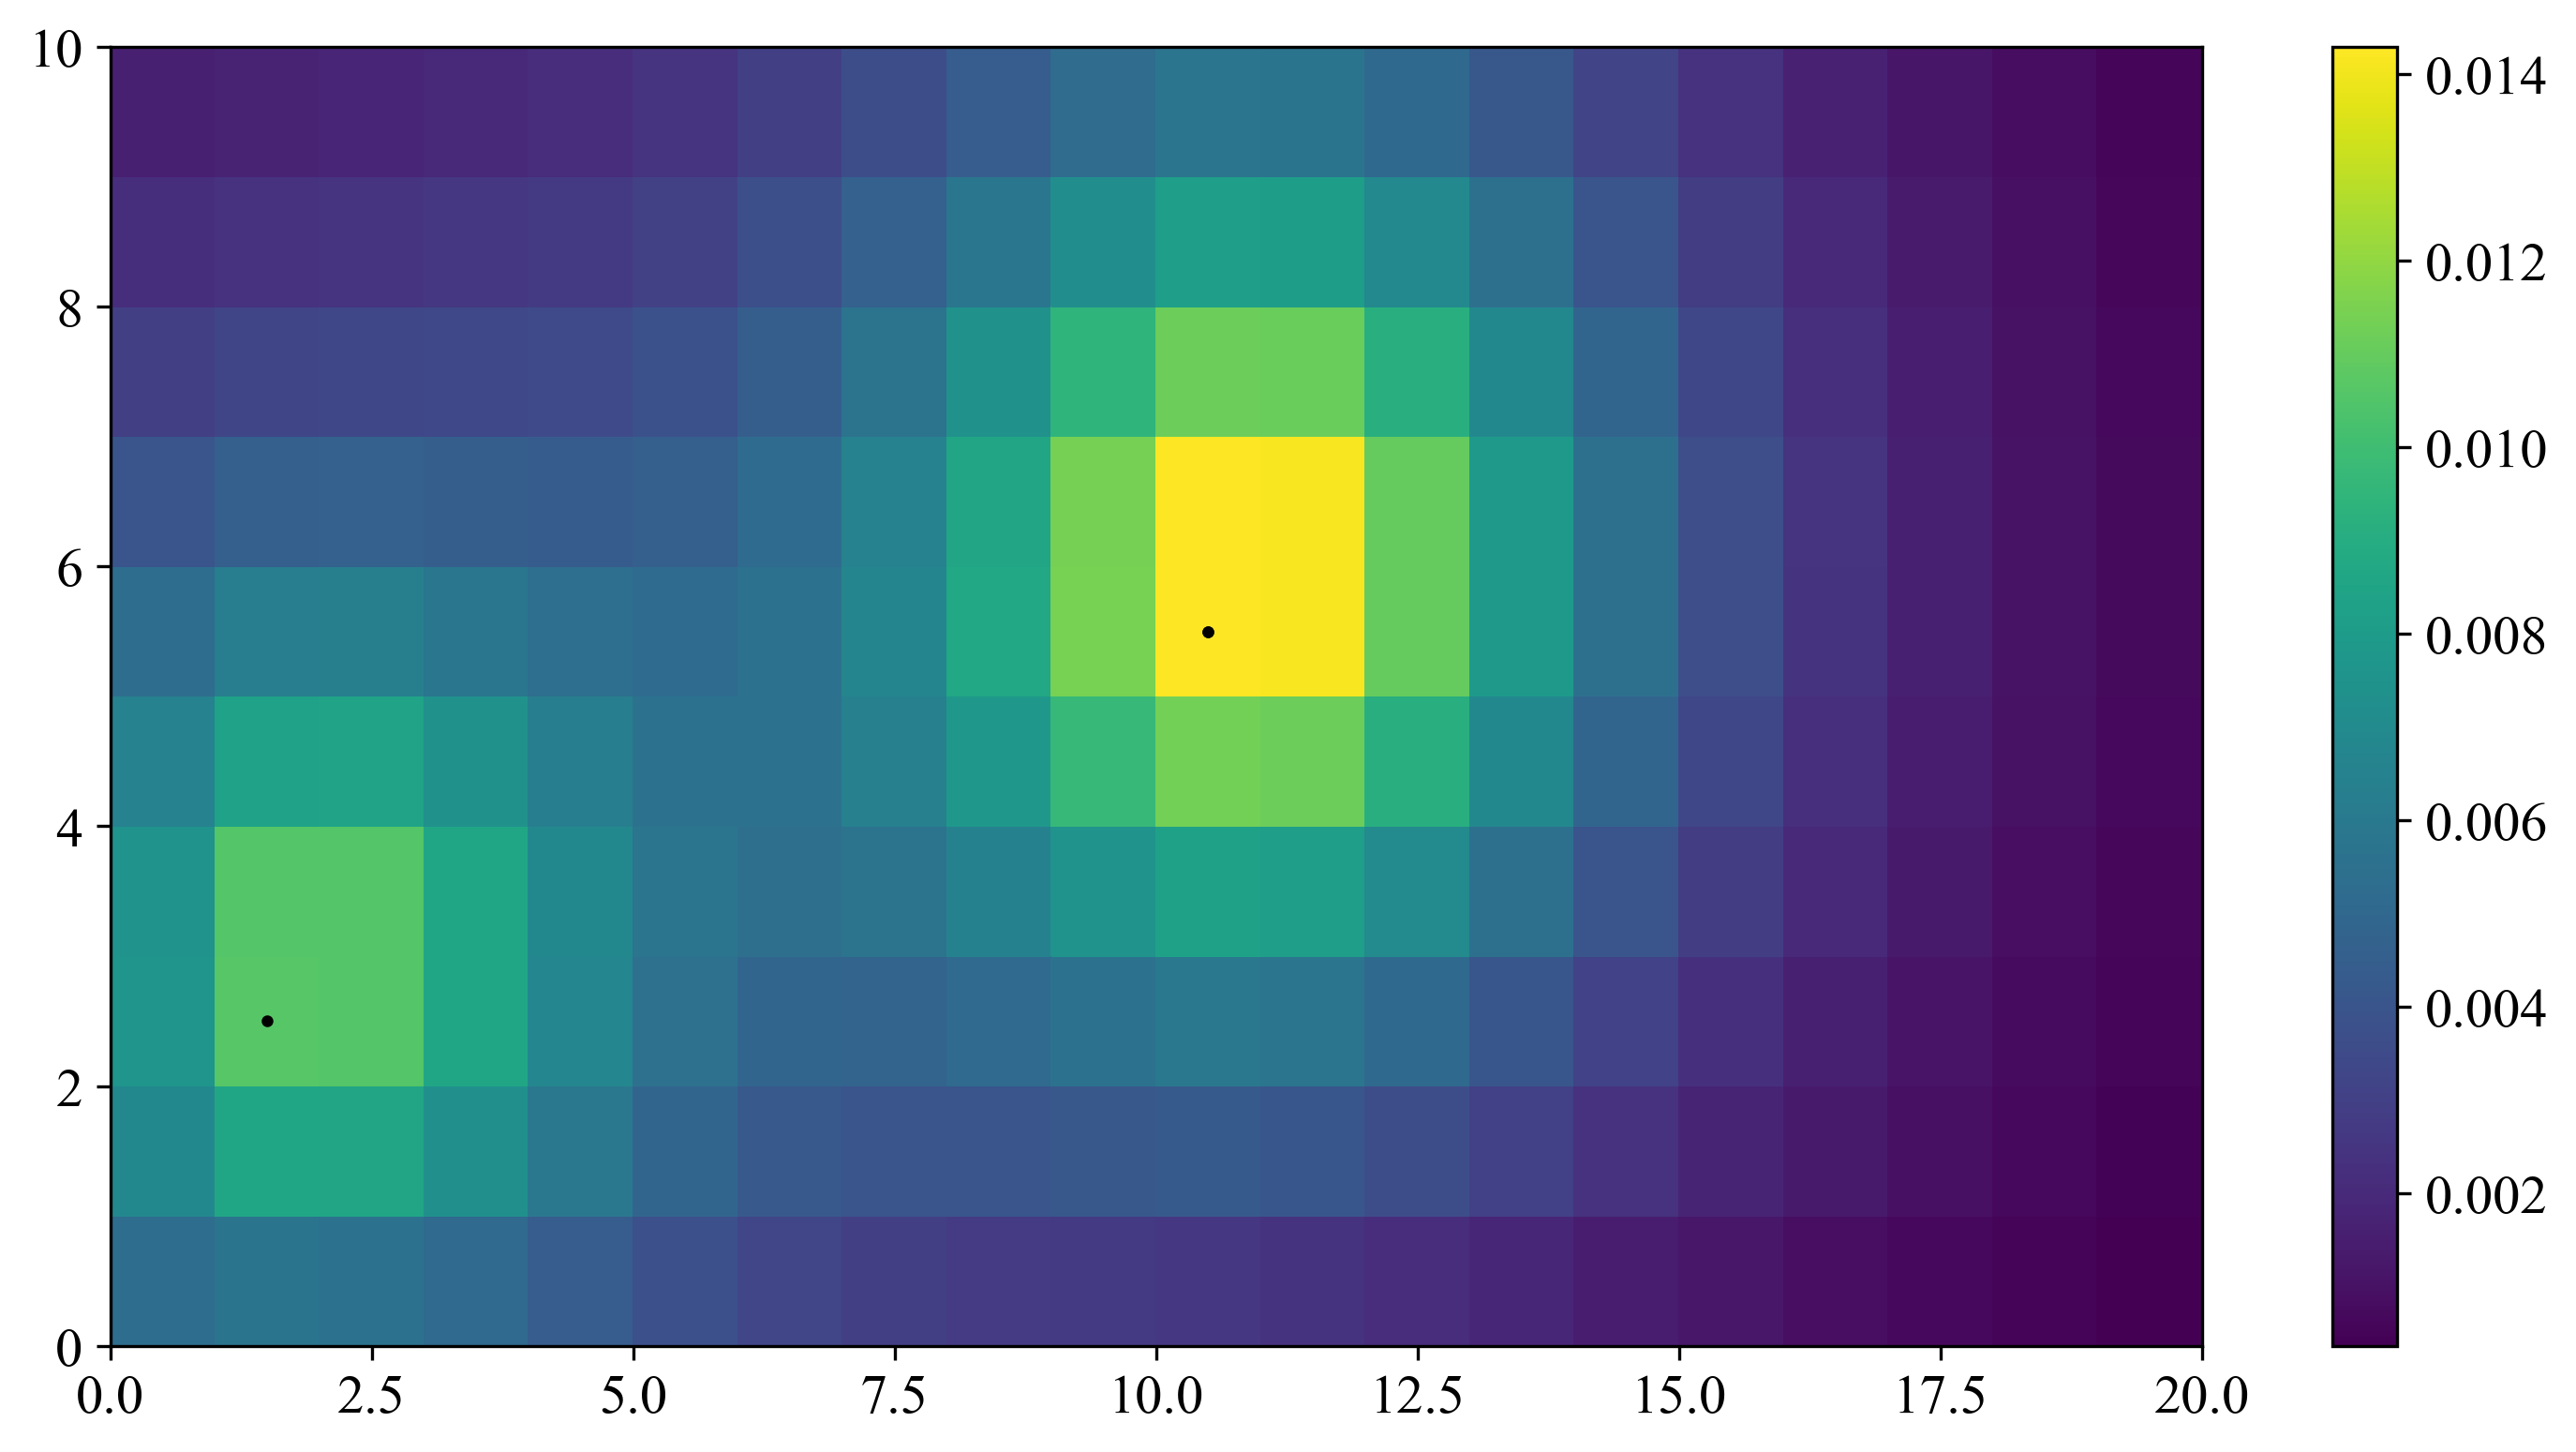

  0.002684 seconds (2.54 k allocations: 3.049 MiB)


In [42]:
lonpre = [10.5, 10.5, 1.5]
latpre = [5.5, 5.5, 2.5]
@time dens3, LHM3, LCV3, LSCV3 = DIVAnd_heatmap(mask, (pm,pn), (xx, yy), 
    (lonpre, latpre), ones(length(lonpre)), L);
plot_analysis(xx, yy, dens3, lonpre, latpre);

### 4. Presence and absence data
Adding an absence data point at the same location

In [62]:
function compute_density(lonpre, latpre, lonabs, latabs, L)
    npre = length(lonpre)
    nabs = length(lonabs)
    @time dens_pre, LHM1, LCV1, LSCV1 = DIVAnd_heatmap(mask, (pm,pn), (xx, yy), 
        (lonpre, latpre), ones(npre), L);
    @time dens_abs, LHM2, LCV2, LSCV2 = DIVAnd_heatmap(mask, (pm,pn), (xx, yy), 
        (lonabs, latabs), ones(nabs), L);
    d = npre * dens_pre ./ (npre * dens_pre .+ nabs * dens_abs);
    return d
end

compute_density (generic function with 1 method)

In [63]:
function plot_dens(xx, yy, d, lonpre, latpre, lonabs, latabs)
    fig = figure(figsize=(12, 6))
    pcm = PyPlot.pcolormesh(xx, yy, d, vmin=0., vmax=1.)
    colorbar(pcm)
    plot(lonabs, latabs, "wx", ms=10)
    plot(lonpre, latpre, "ko", ms=2)
    show()
end

plot_dens (generic function with 1 method)

  0.009316 seconds (2.53 k allocations: 3.049 MiB)
  0.006197 seconds (2.39 k allocations: 2.951 MiB)


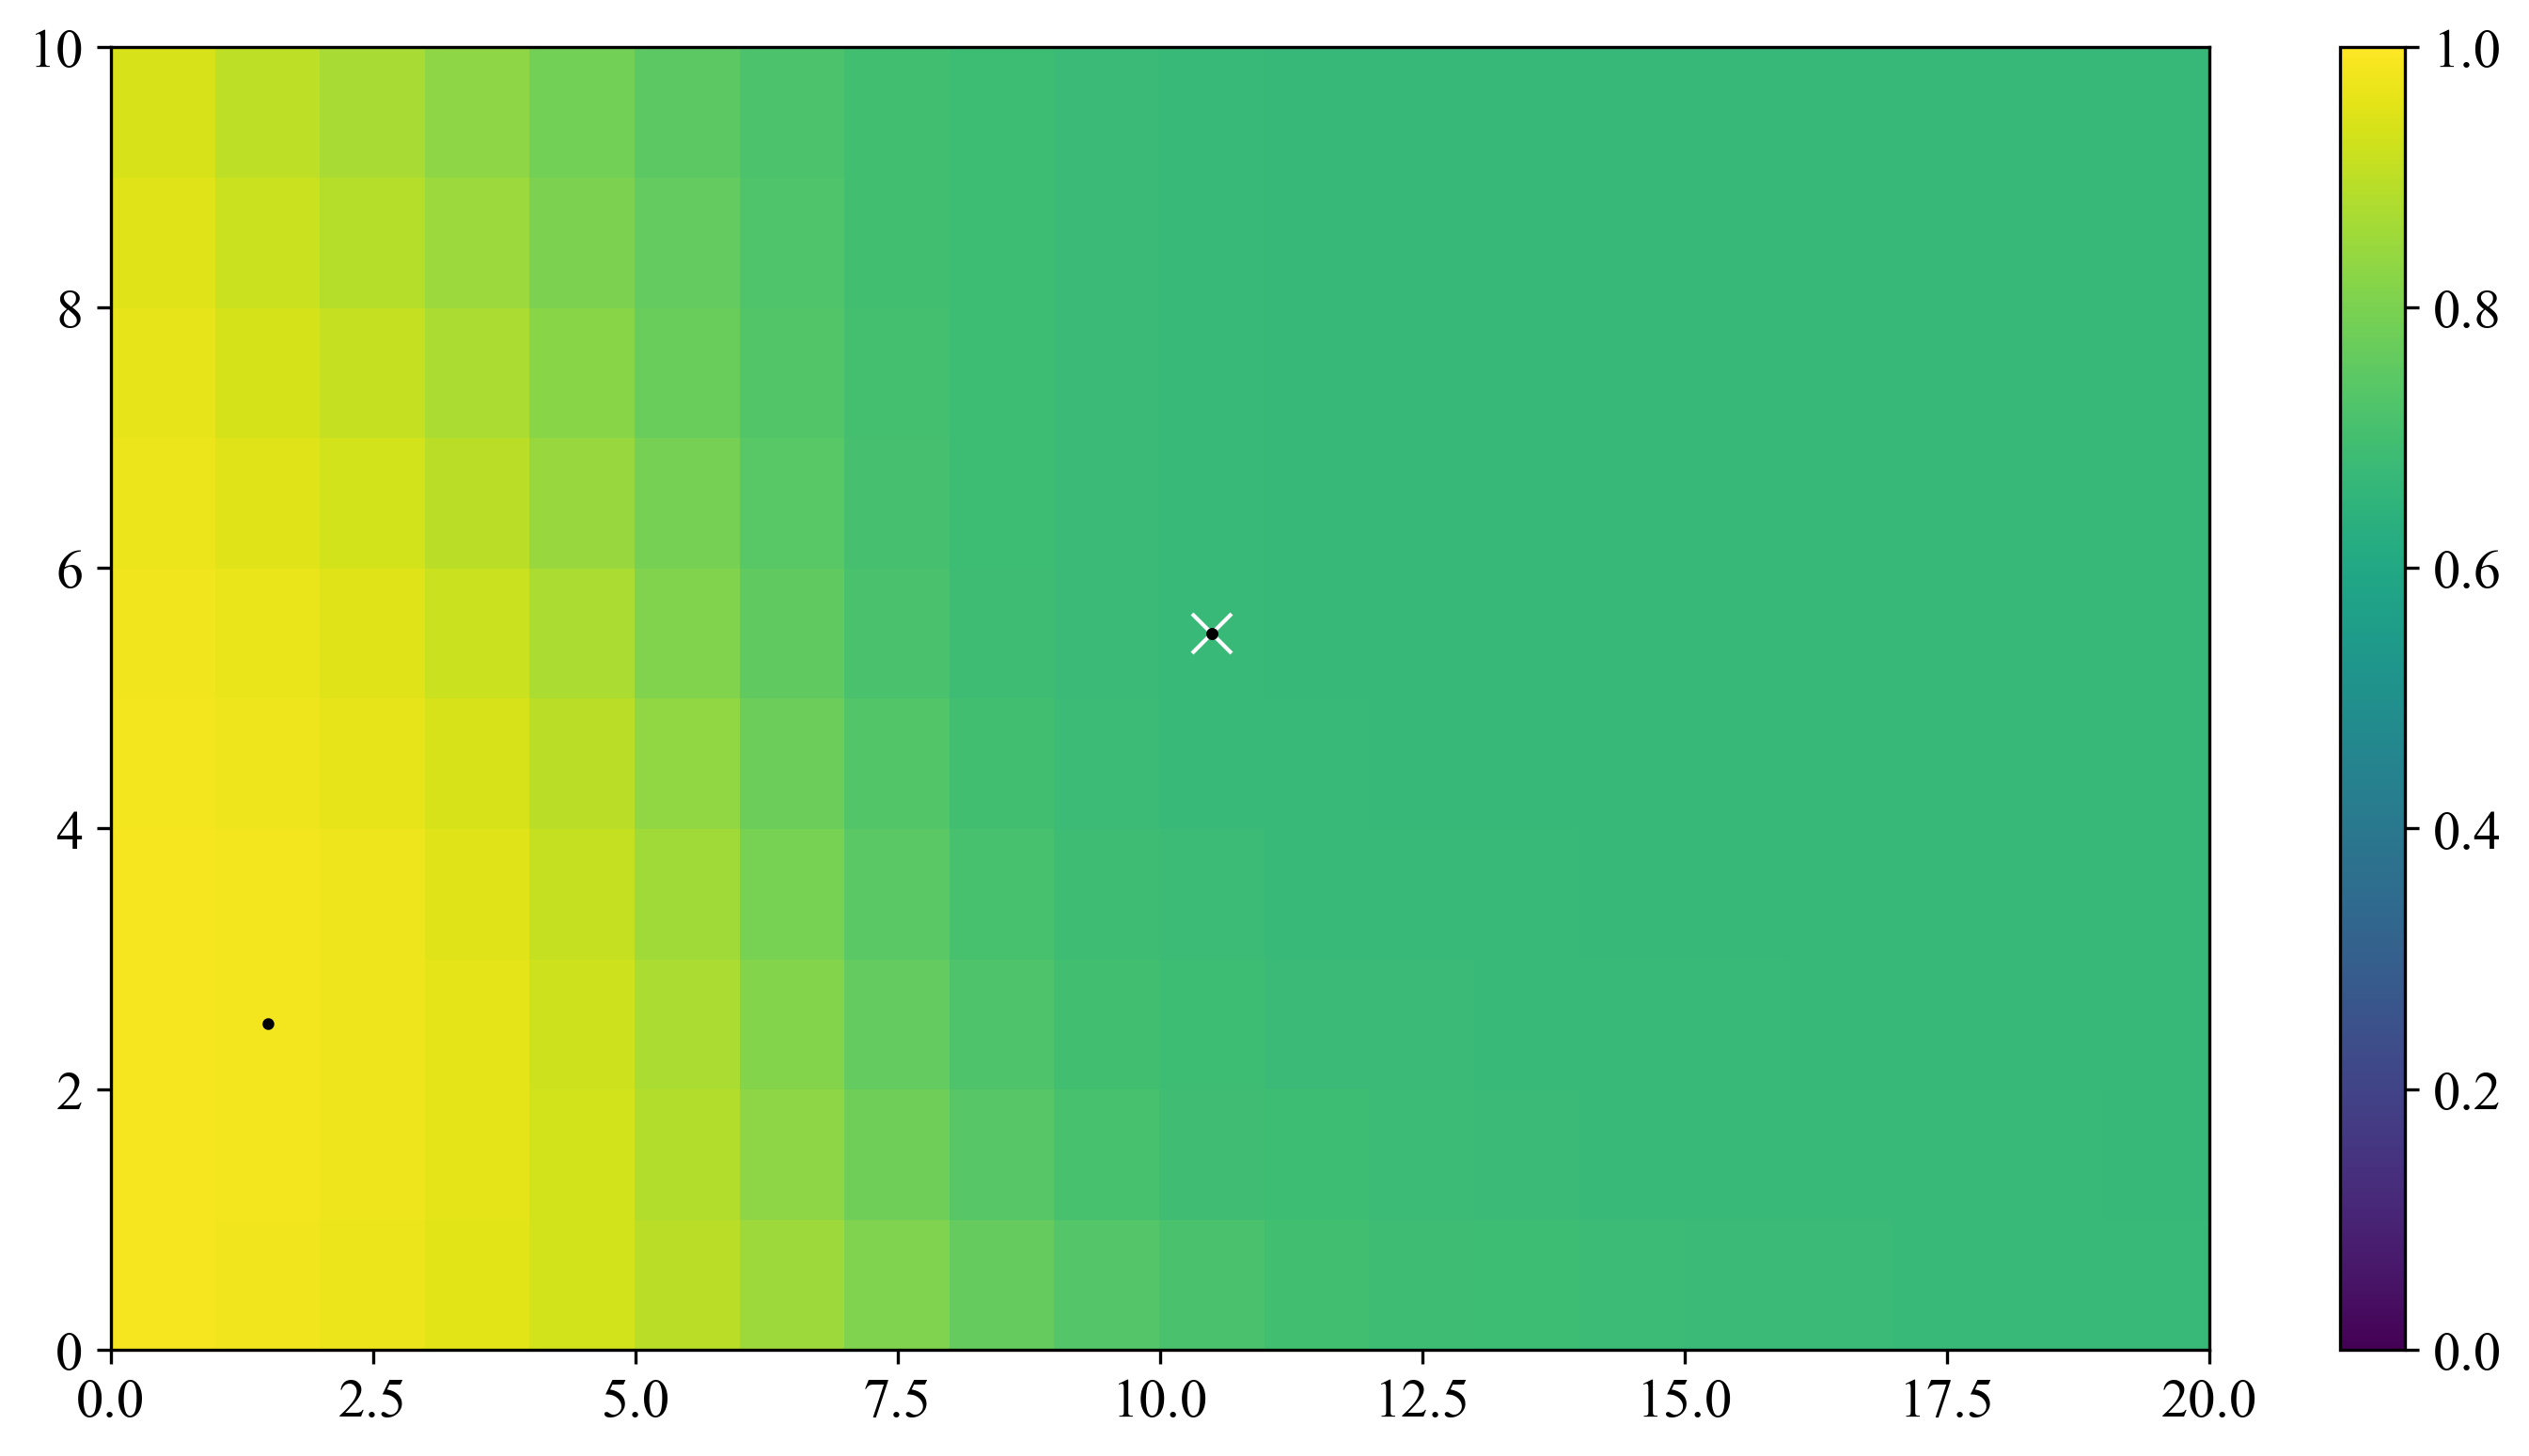

d1[11, 6] = 0.6729803601069657


0.6729803601069657

In [69]:
lonpre = [10.5, 10.5, 1.5]
latpre = [5.5, 5.5, 2.5]
lonabs = [10.5]
latabs = [5.5]
d1 = compute_density(lonpre, latpre, lonabs, latabs, L);
plot_dens(xx, yy, d1, lonpre, latpre, lonabs, latabs);
@show(d1[11,6])

### 5. More abscence than presence 

  0.017667 seconds (2.53 k allocations: 3.049 MiB)
  0.009484 seconds (3.02 k allocations: 3.391 MiB)


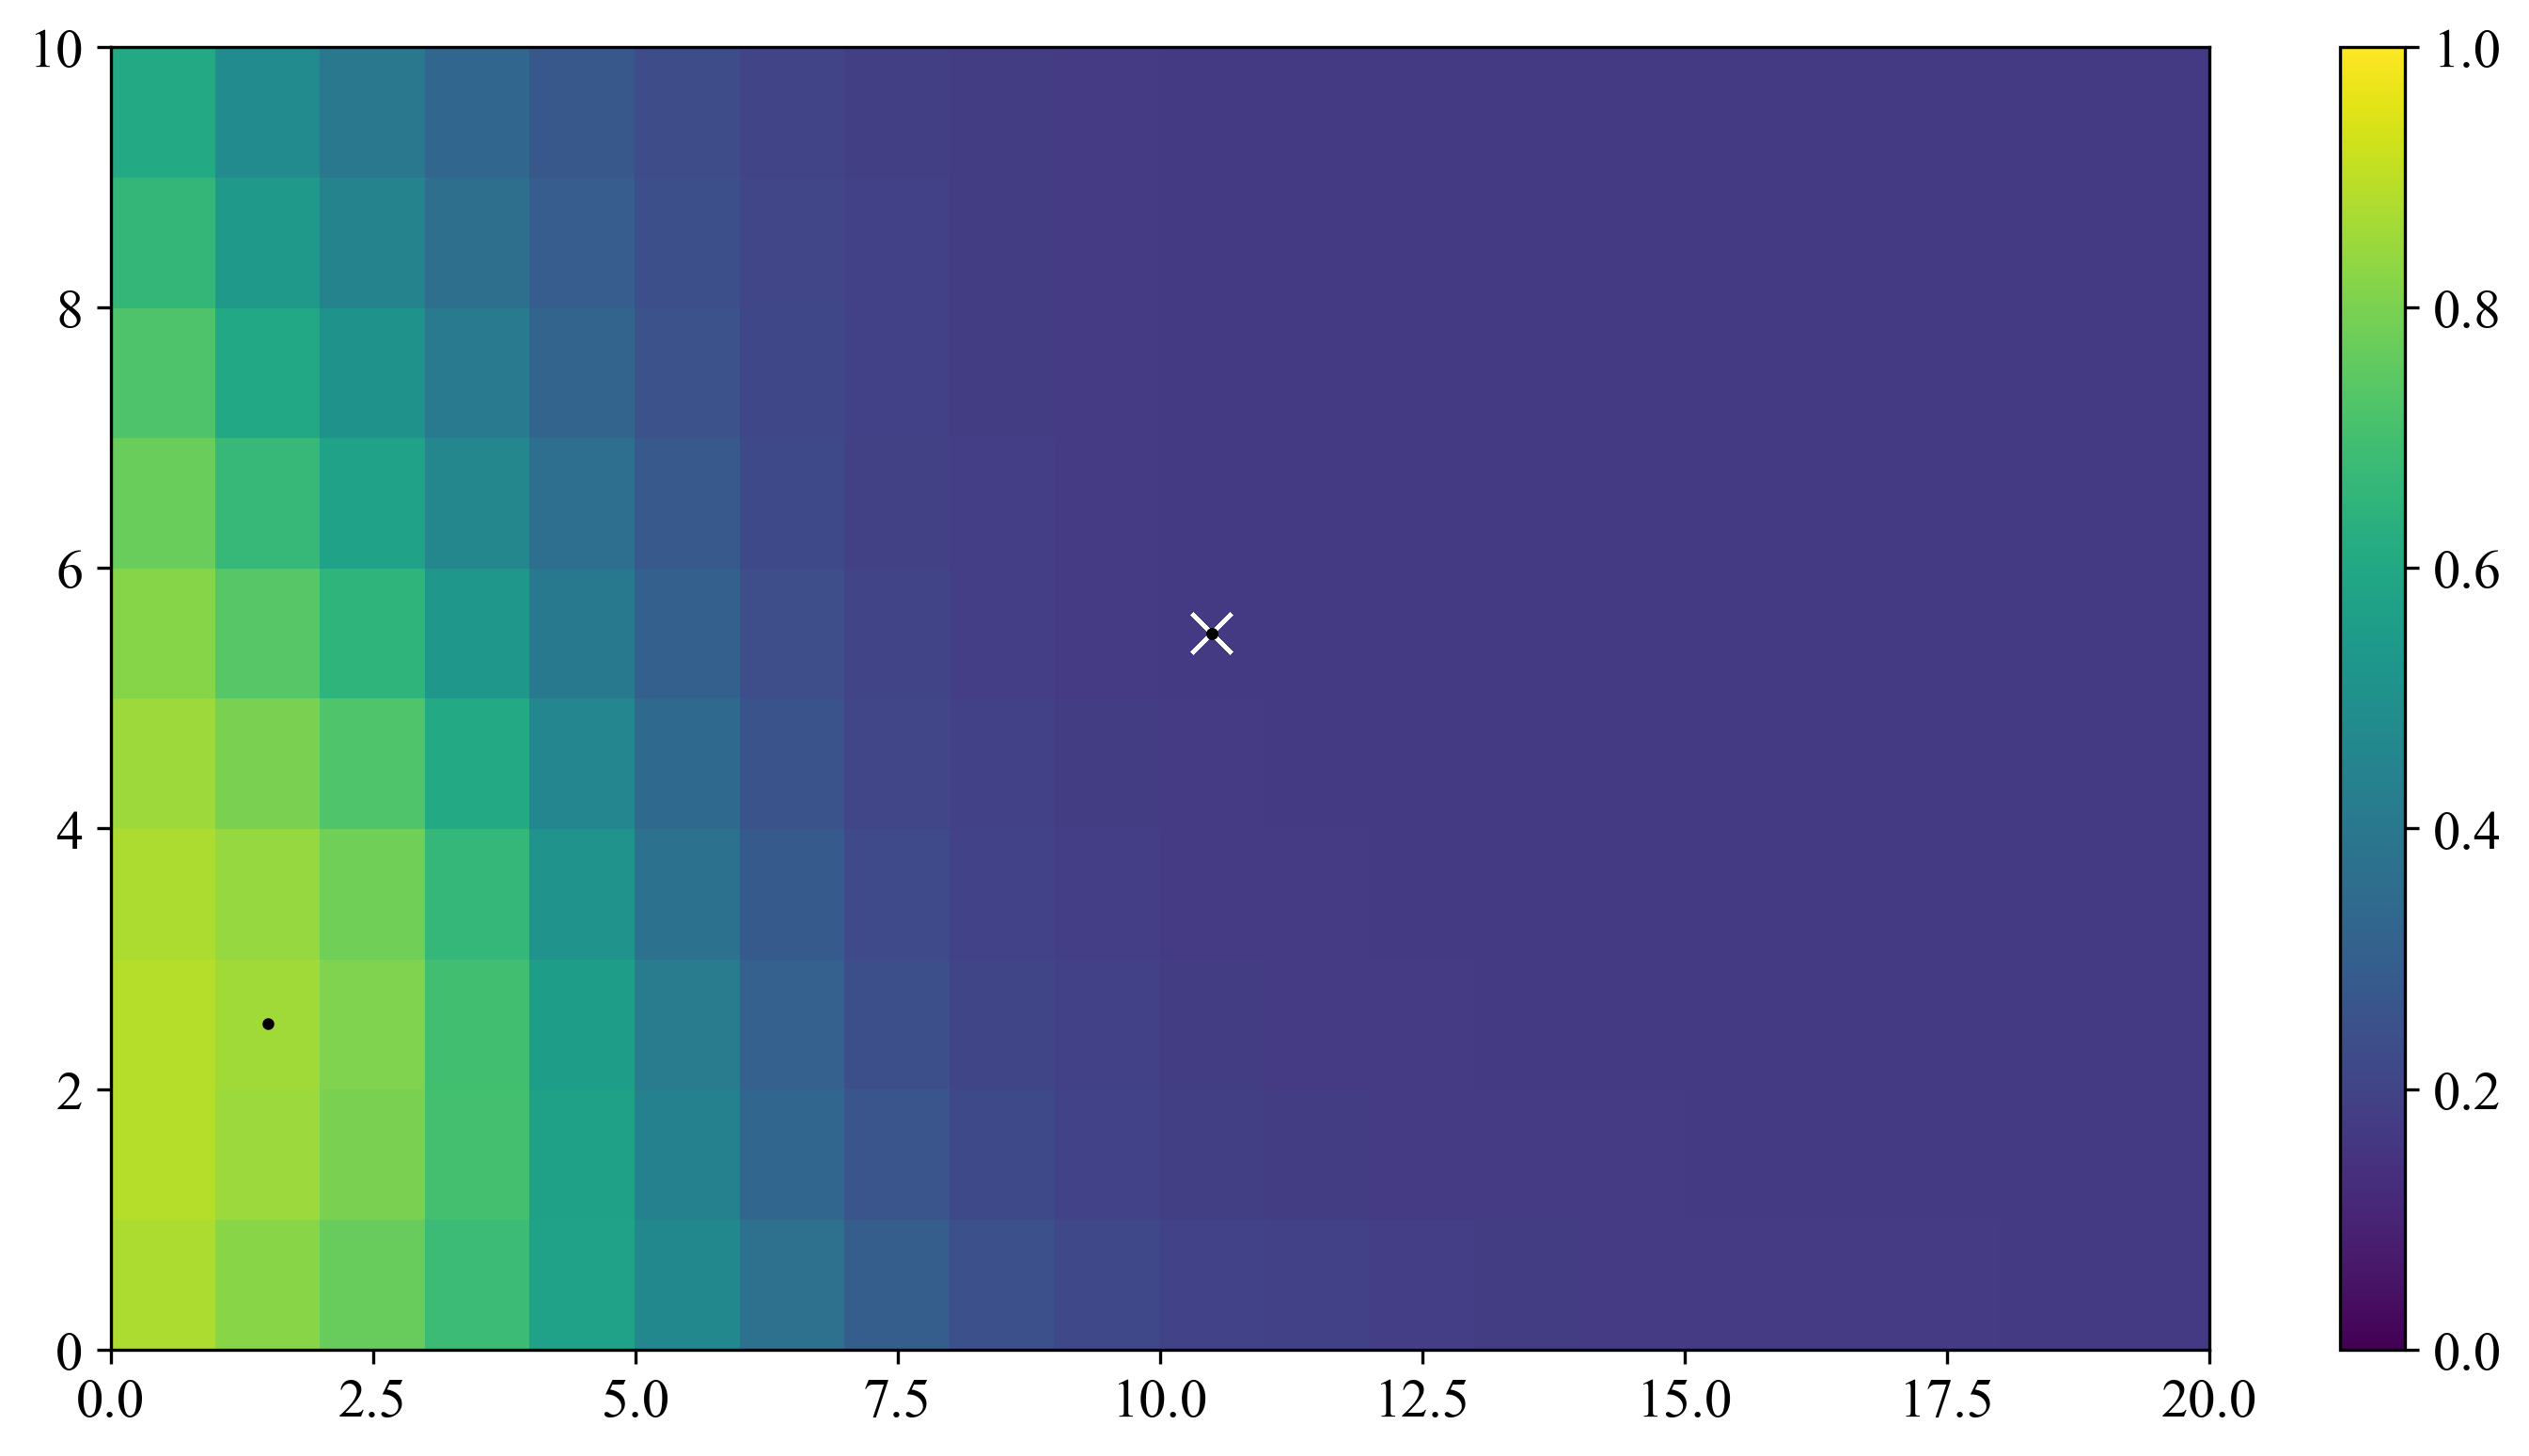

d2[11, 6] = 0.17066958983377364


0.17066958983377364

In [71]:
lonpre = [10.5, 10.5, 1.5]
latpre = [5.5, 5.5, 2.5]
lonabs = 10.5 * ones(10)
latabs = 5.5 * ones(10)
d2 = compute_density(lonpre, latpre, lonabs, latabs, L);
plot_dens(xx, yy, d2, lonpre, latpre, lonabs, latabs);
@show(d2[11,6])

  0.008167 seconds (2.53 k allocations: 3.049 MiB)


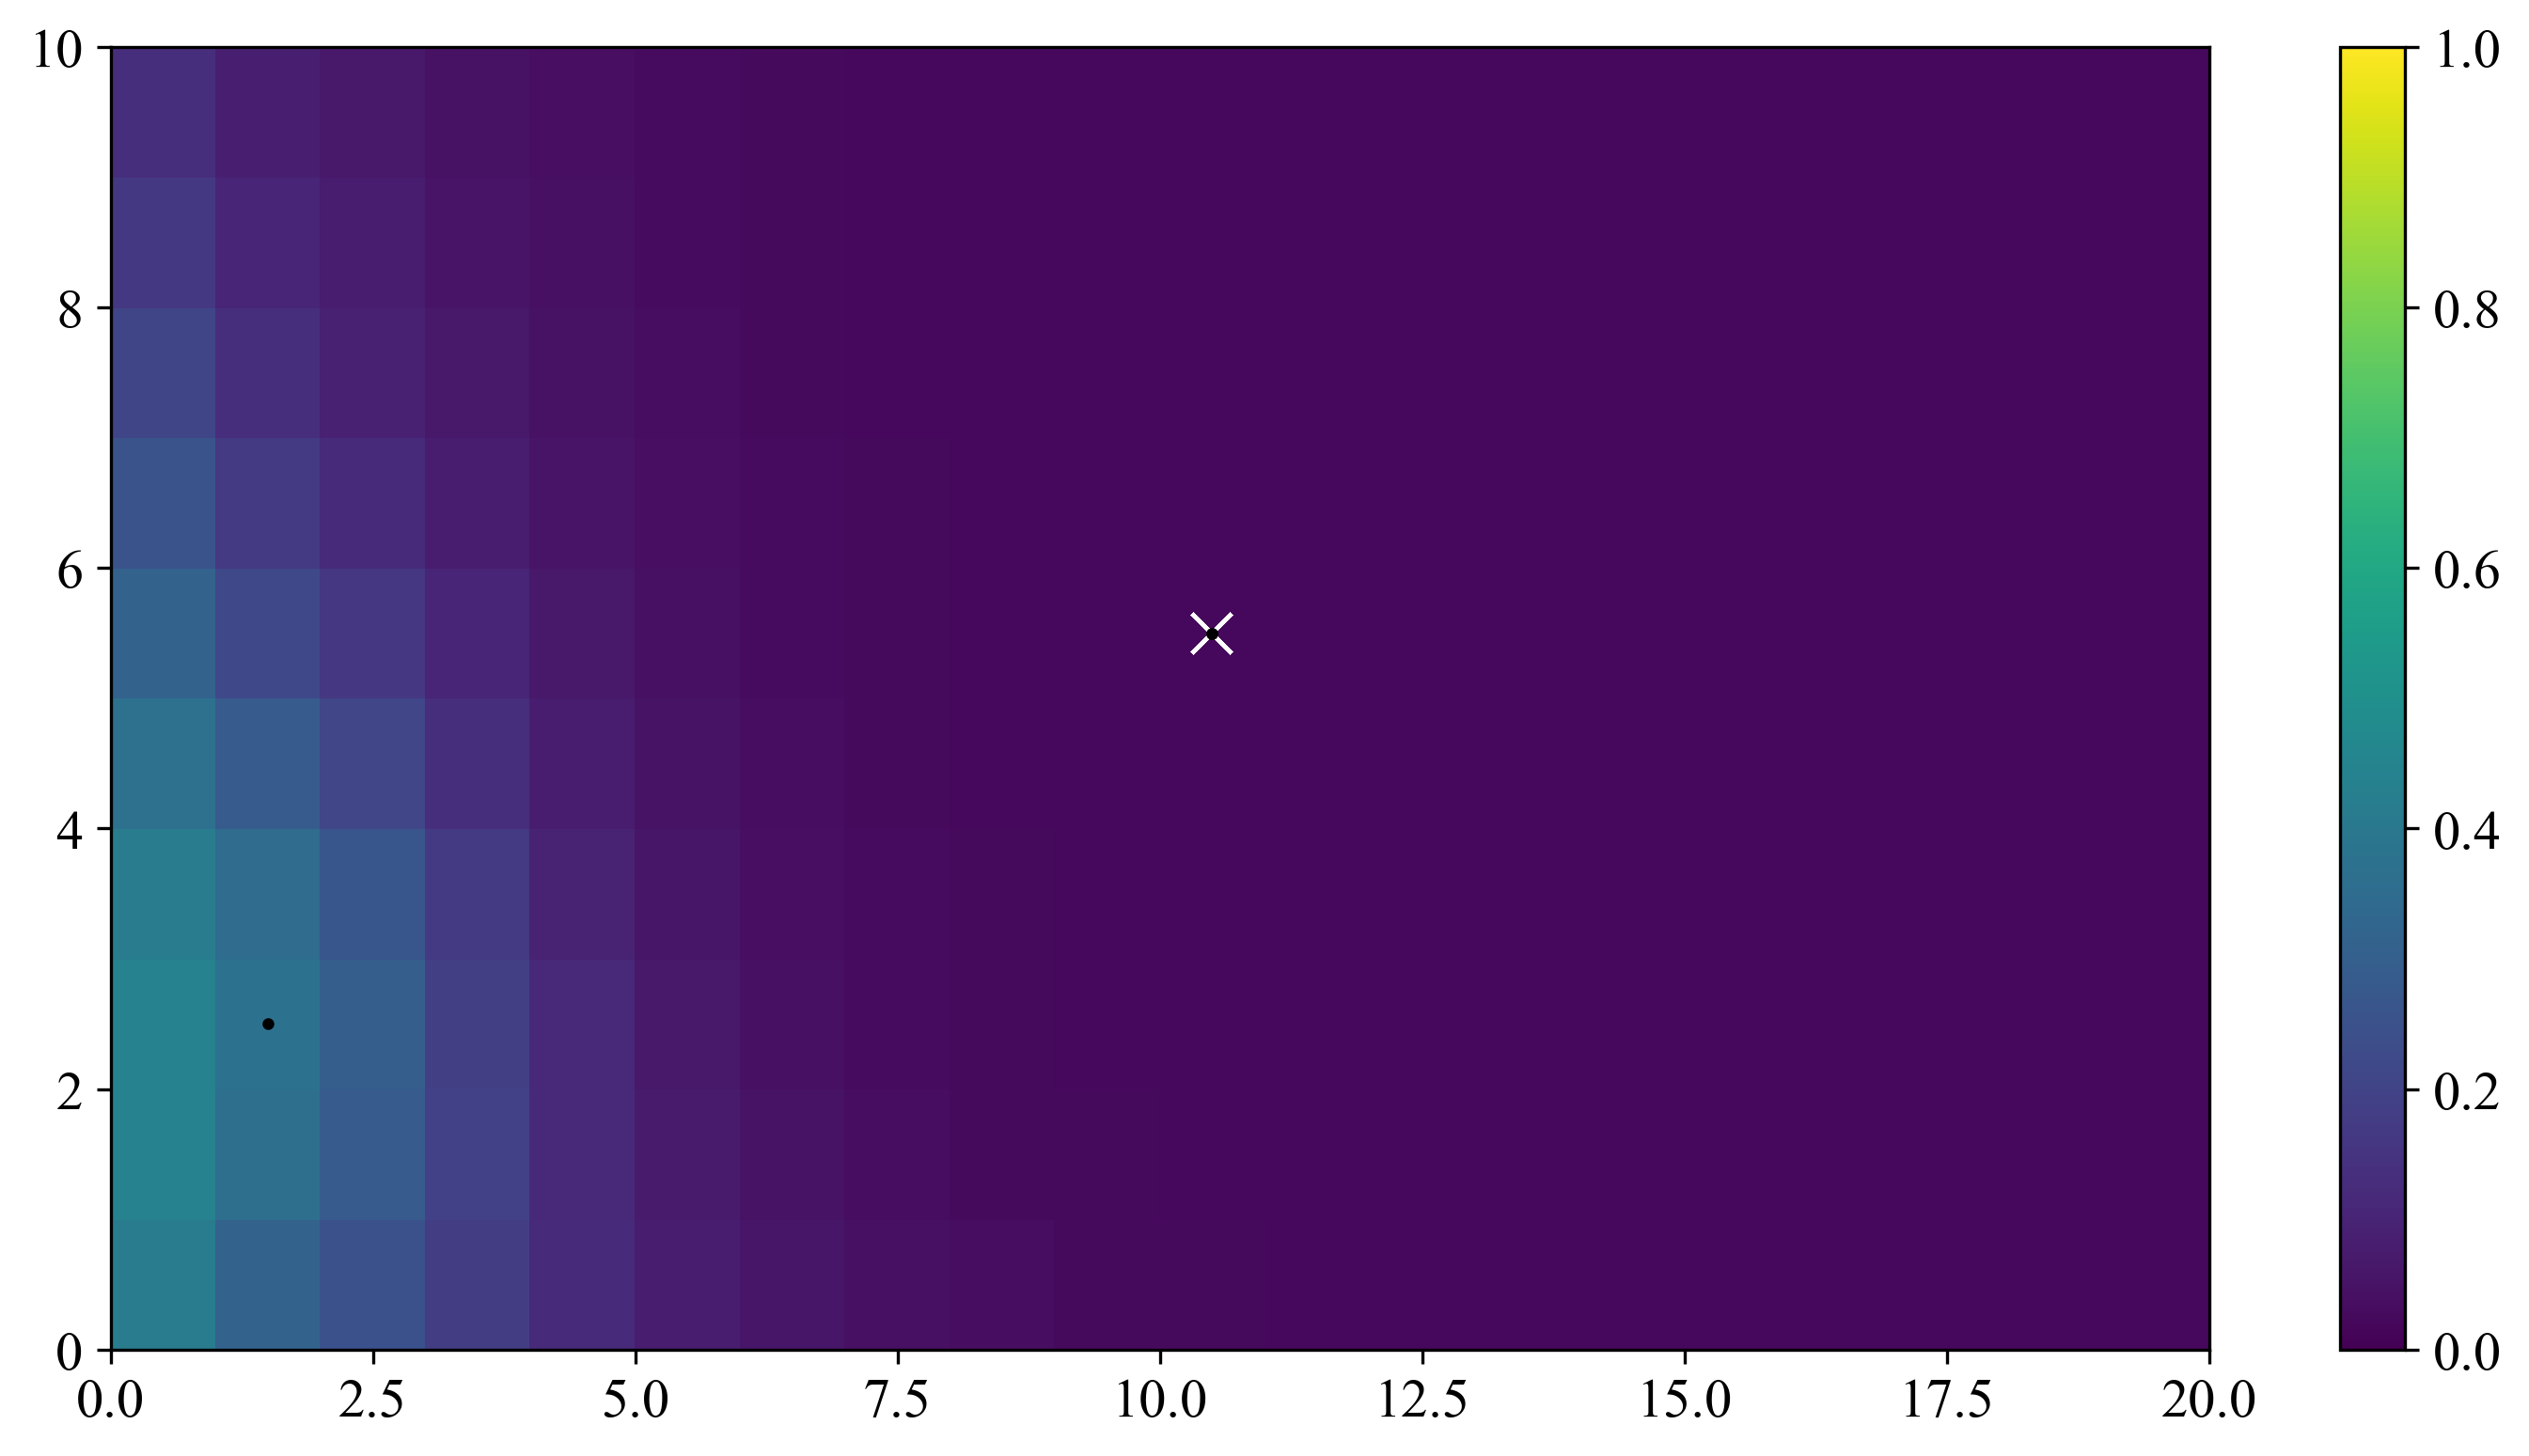

  0.159049 seconds (9.33 k allocations: 7.873 MiB, 94.69% gc time)
d3[11, 6] = 0.02016423916880186


0.02016423916880186

In [72]:
lonpre = [10.5, 10.5, 1.5]
latpre = [5.5, 5.5, 2.5]
lonabs = 10.5 * ones(100)
latabs = 5.5 * ones(100)
d3 = compute_density(lonpre, latpre, lonabs, latabs, L);
plot_dens(xx, yy, d3, lonpre, latpre, lonabs, latabs);
@show(d3[11,6])

More presence than absence

  0.007910 seconds (2.74 k allocations: 3.195 MiB)
  0.003802 seconds (2.39 k allocations: 2.951 MiB)


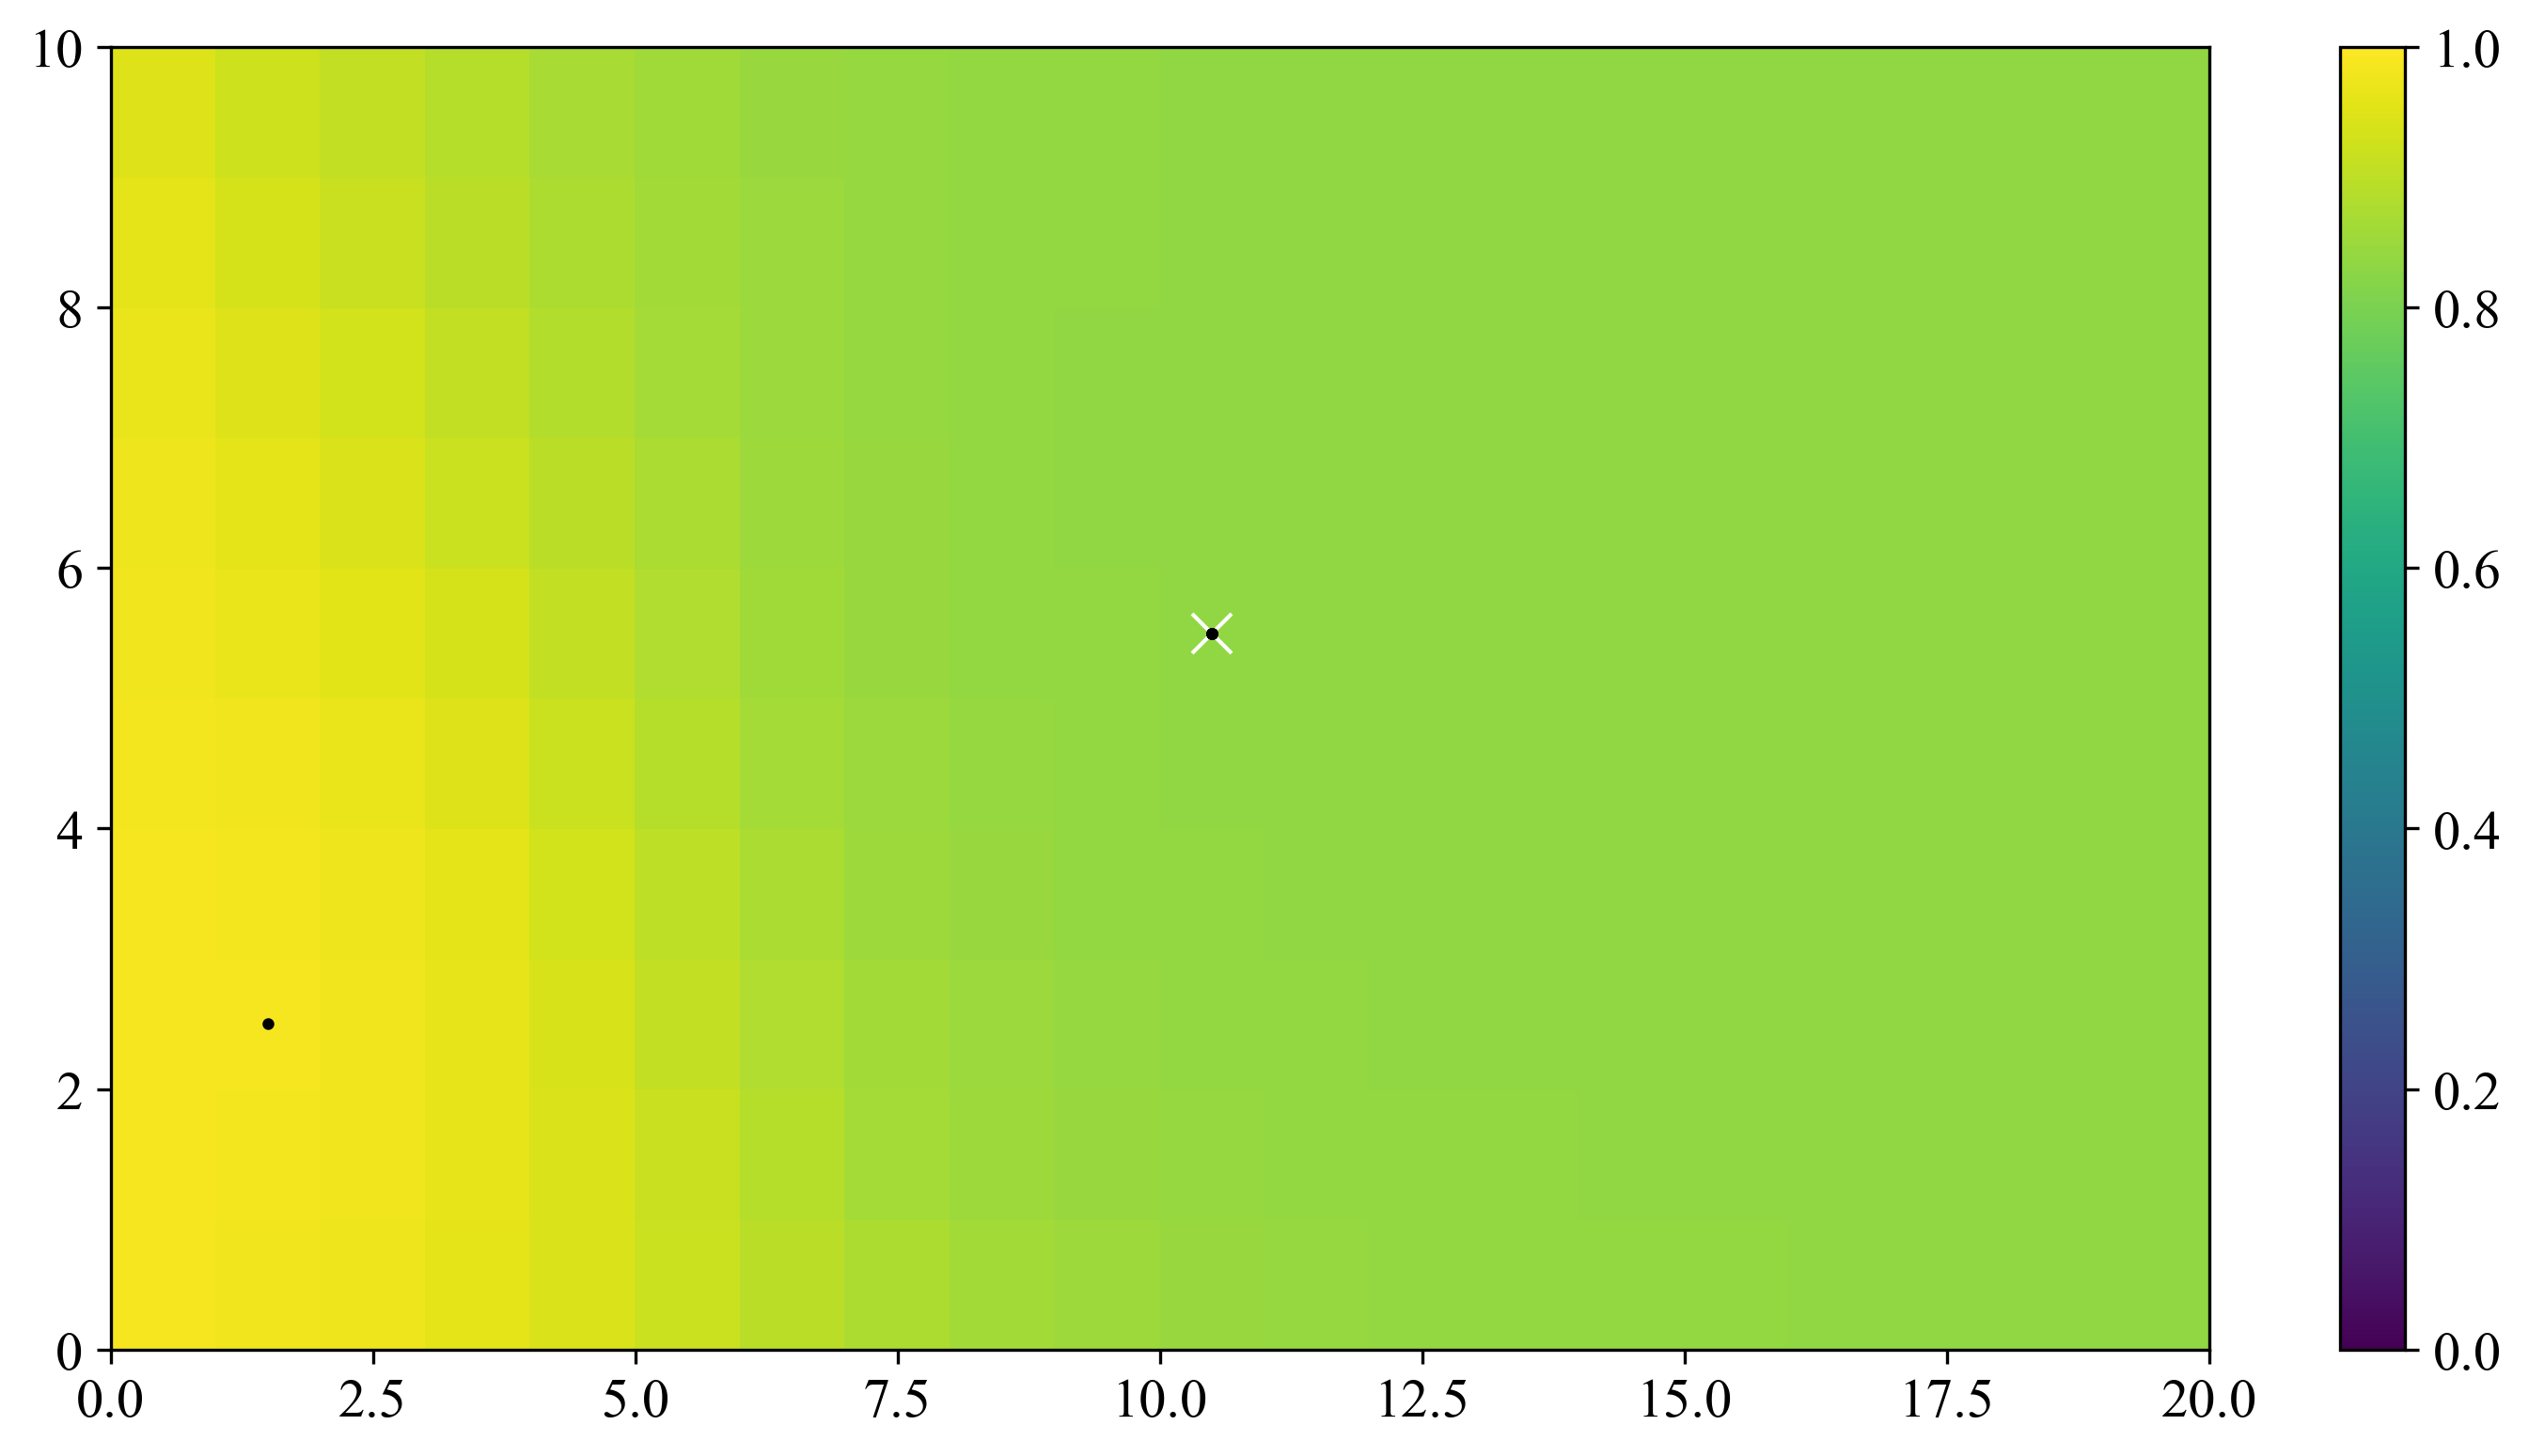

d4[11, 6] = 0.8349268481392376


0.8349268481392376

In [76]:
lonpre = [10.5 * ones(5); 1.5]
latpre = [5.5 * ones(5); 2.5]
lonabs = [10.5]
latabs = [5.5] 
d4 = compute_density(lonpre, latpre, lonabs, latabs, L);
plot_dens(xx, yy, d4, lonpre, latpre, lonabs, latabs);
@show(d4[11,6])